In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory


# 1st - model from scratch
NUM_CLASSES = 5
IMG_SIZE = 224

# Create a sequential model with a list of layers
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(NUM_CLASSES)
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])



In [2]:
# Set the parameters for your data
batch_size = 32
image_size = (224,224)
validation_split = 0.2

# Create the training dataset from the 'train' directory
train_ds = image_dataset_from_directory(
    directory='./train/train',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Create the validation dataset from the 'train' directory
validation_ds = image_dataset_from_directory(
    directory='./train/train',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

test_ds = image_dataset_from_directory(
    directory='./test',
    batch_size=batch_size,
    image_size=image_size
)

class_names = train_ds.class_names
print(class_names)
print(train_ds)
for images, labels in train_ds.take(1):  # 'take(1)' takes just one batch from the dataset
    print("Shape of training images:", images.shape)  # Prints the shape of images
    print("Shape of training labels:", labels.shape)

Found 2026 files belonging to 5 classes.
Using 1621 files for training.
Found 2026 files belonging to 5 classes.
Using 405 files for validation.
Found 473 files belonging to 1 classes.
['Cat', 'Cheetah', 'Leopard', 'Lion', 'Tiger']
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Shape of training images: (32, 224, 224, 3)
Shape of training labels: (32,)


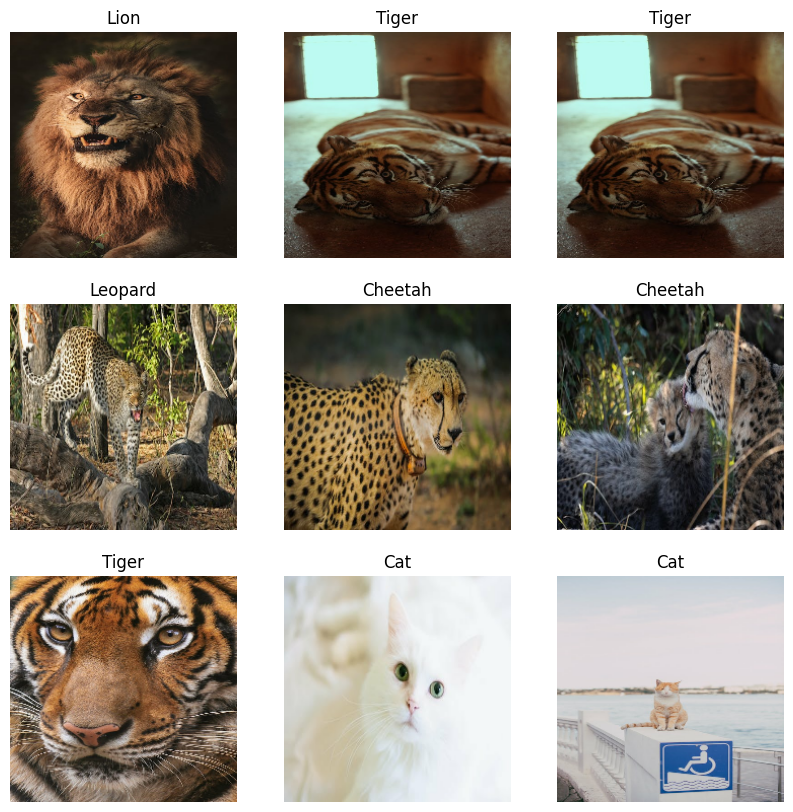

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [4]:
history = model.fit(
  train_ds,
  validation_data=validation_ds,
            epochs = 5
)

Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.2849 - loss: 1.5696 - val_accuracy: 0.4914 - val_loss: 1.3002
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.6248 - loss: 1.0557 - val_accuracy: 0.6667 - val_loss: 0.9499
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.7814 - loss: 0.6199 - val_accuracy: 0.8198 - val_loss: 0.6016
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.8928 - loss: 0.3710 - val_accuracy: 0.8568 - val_loss: 0.5167
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.9296 - loss: 0.2360 - val_accuracy: 0.8840 - val_loss: 0.4055


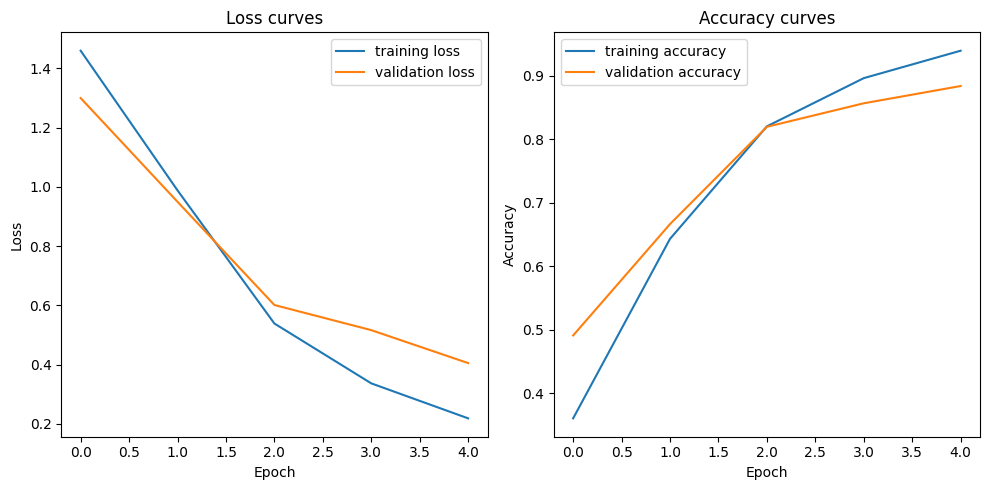

In [5]:
def plotLosses(history):
  # Create a figure and a grid of subplots with a single call
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
  # Plot the loss curves on the first subplot
  ax1.plot(history.history['loss'], label='training loss')
  ax1.plot(history.history['val_loss'], label='validation loss')
  ax1.set_title('Loss curves')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss')
  ax1.legend()
  # Plot the accuracy curves on the second subplot
  ax2.plot(history.history['accuracy'], label='training accuracy')
  ax2.plot(history.history['val_accuracy'], label='validation accuracy')
  ax2.set_title('Accuracy curves')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  # Adjust the spacing between subplots
  fig.tight_layout()
  # Show the figure
  plt.show()


plotLosses(history)

In [6]:
import numpy as np

predictions = model.predict(test_ds)
predicted_classes = np.argmax(predictions, axis=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [7]:
import pandas as pd

# Suppose you need to extract IDs from filenames (common in competitions)
file_paths = test_ds.file_paths  # This attribute might not exist directly; might need modification
ids = [fp.split('\\')[-1].split('.')[0] for fp in file_paths]

submission_df = pd.DataFrame({
    'id': ids,
    'label': predicted_classes
})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)